In [13]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle


In [14]:
CHARACTER_PATHS = r'./characters-1/'
IMAGE_WIDTH = 20
IMAGE_HEIGHT = 20

SVM_KERNEL = 'poly'
MODEL_NAME = 'svm_model-2.pkl'

In [15]:
images = os.listdir(CHARACTER_PATHS)


pixel_data = []
label_data = []
for index, image_path in enumerate(images):
    
    label = image_path.split('-')[0]
    image = cv2.imread(CHARACTER_PATHS + image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (IMAGE_WIDTH, IMAGE_HEIGHT))
    
    cv2.threshold(image, 127, 255, cv2.THRESH_BINARY, image)
    
    vertical_pixel_count = np.sum(image == 255, axis=0)
    
    pixel_data.append(vertical_pixel_count)
    label_data.append(label)

In [16]:
Y = np.array(list(map(int, label_data)))
X = np.array(pixel_data)

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [18]:
model = svm.SVC(kernel=SVM_KERNEL)

model.fit(X_train, Y_train)

SVC(kernel='poly')

In [19]:
Y_pred = model.predict(X_test)

In [20]:
accuracy = accuracy_score(Y_test, Y_pred)

print(accuracy)

0.6637168141592921


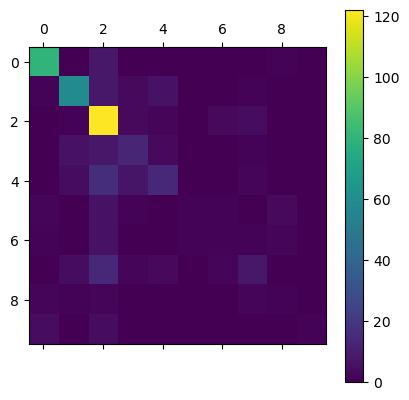

In [21]:
cfm = confusion_matrix(Y_test, Y_pred)

plt.matshow(cfm)
plt.colorbar()
plt.show()

In [22]:
X_test[0]

array([14, 14, 14, 13, 11, 14, 14, 14, 13,  5,  1,  1,  1,  1,  4, 11, 20,
       20, 20, 20])

In [23]:
report = classification_report(Y_test, Y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.89      0.90      0.89        89
           1       0.79      0.76      0.77        78
           2       0.63      0.90      0.74       135
           3       0.45      0.42      0.43        31
           4       0.50      0.33      0.39        43
           5       0.50      0.07      0.12        14
           6       0.14      0.08      0.11        12
           7       0.42      0.24      0.31        33
           8       0.14      0.12      0.13         8
           9       1.00      0.11      0.20         9

    accuracy                           0.66       452
   macro avg       0.55      0.39      0.41       452
weighted avg       0.65      0.66      0.63       452



In [24]:
with open(MODEL_NAME, 'wb') as f:
    pickle.dump(model, f)